# Linear Regression

<!-- ![Linear regression image](https://production-media.paperswithcode.com/methods/2560px-Linear_regression.svg_wwqz1f3.png) -->

<img src="https://production-media.paperswithcode.com/methods/2560px-Linear_regression.svg_wwqz1f3.png" alt="drawing" width="1000"/>

![ML System](data/ML_System.drawio.png)


https://github.com/42-AI/bootcamp_machine-learning

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import random

# %matplotlib notebook
# %matplotlib widget
# %matplotlib inline


MIN_VALUE = 0
MAX_VALUE = 1
NB_ELEMENTS = 100

x = np.linspace(MIN_VALUE, MAX_VALUE, NB_ELEMENTS)
COEF_A_MIN = 0
COEF_A_MAX = 5

COEF_B_MIN = 0
COEF_B_MAX = 5

COEF_A = (random.random() - COEF_A_MIN) * COEF_A_MAX
COEF_B = (random.random() - COEF_B_MIN) * COEF_B_MAX
random_noise = np.random.random(NB_ELEMENTS) * MAX_VALUE * 2
random_noise -= random_noise.mean()
# y = (a * x) + b
# plt.scatter(x, y)
y = (COEF_A * x) + COEF_B + random_noise

print(f"{x.shape = }")
print(f"{y.shape = }")
print(f"{COEF_A = }")
print(f"{COEF_B = }")

x.shape = (100,)
y.shape = (100,)
COEF_A = 3.581972505601348
COEF_B = 3.213832162562762


# Data

$m$ is the number of examples

$n$ is the number of dimensions / features

# X can have multiple features

$$
X^{(m)}_n
$$

# Y only has one dimension

$$
Y^{(m)}
$$

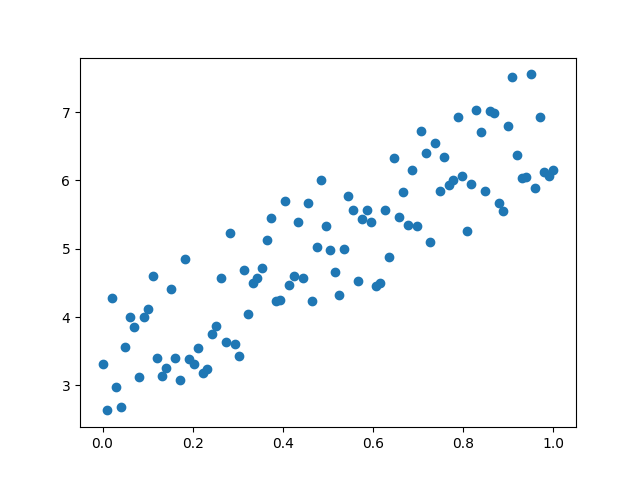

In [2]:
plt.scatter(x, y)

# Predict

A simple formula:
$$
\hat{y} = ax + b
$$

That we can genralize to multiple dimensions with Thetas:
$$
\hat{y} = θ_0 \cdot x + θ_1
$$

# Cost

For each prediction we will measure the difference between the prediction and the true value
$$
\text{Cost}^{(i)} = (\hat{y}^{(i)} - y^{(i)})
$$

And we will apply it to our complete dataset and keep the mean

$$
\text{Cost} = \frac{\sum_{i=0}^{m}{(\hat{y}^{(i)} - y^{(i)})}}{m}
$$

In [4]:
def predict(x, thetas):
    a, b = thetas
    y_hat = a * x + b
    return y_hat


def get_cost(y, y_hat):
    return ((y - y_hat) ** 2).sum()


def plot_linear_regression(x, y, thetas, show_errors=False):
    plt.scatter(x, y, c="b")
    y_hat = predict(x, thetas)
    error = get_cost(y, y_hat)
    plt.plot(x, y_hat, c="r")
    if show_errors:
        for x_element, y_element, y_hat_element in zip(x, y, y_hat):
            plt.plot((x_element, x_element), (y_element, y_hat_element), ":y")
    # ax_2d.title(f"Error = {error}")
    return error

a = (random.random() - COEF_A_MIN) * COEF_A_MAX
b = (random.random() - COEF_B_MIN) * COEF_B_MAX
thetas = np.array((a, b))
cost = plot_linear_regression(x, y, thetas, show_errors=True)

We can use our cost formula to get see how good our linear regression

In [5]:
cost = plot_linear_regression(x, y, thetas, show_errors=True)
print(f"{cost = }")

cost = 1618.3778090801843


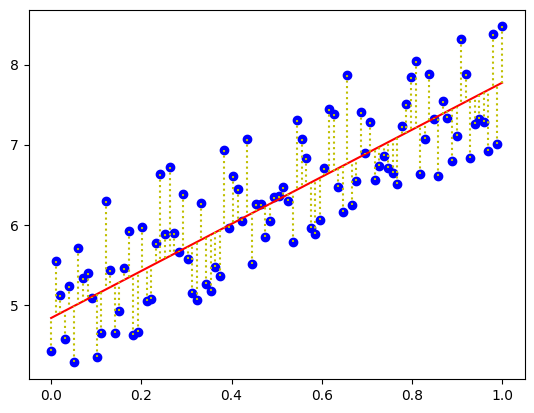

In [5]:
cost = plot_linear_regression(x, y, (COEF_A, COEF_B), show_errors=True)


/tmp/ipykernel_2924069/1317841938.py:35: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax_3d.scatter(


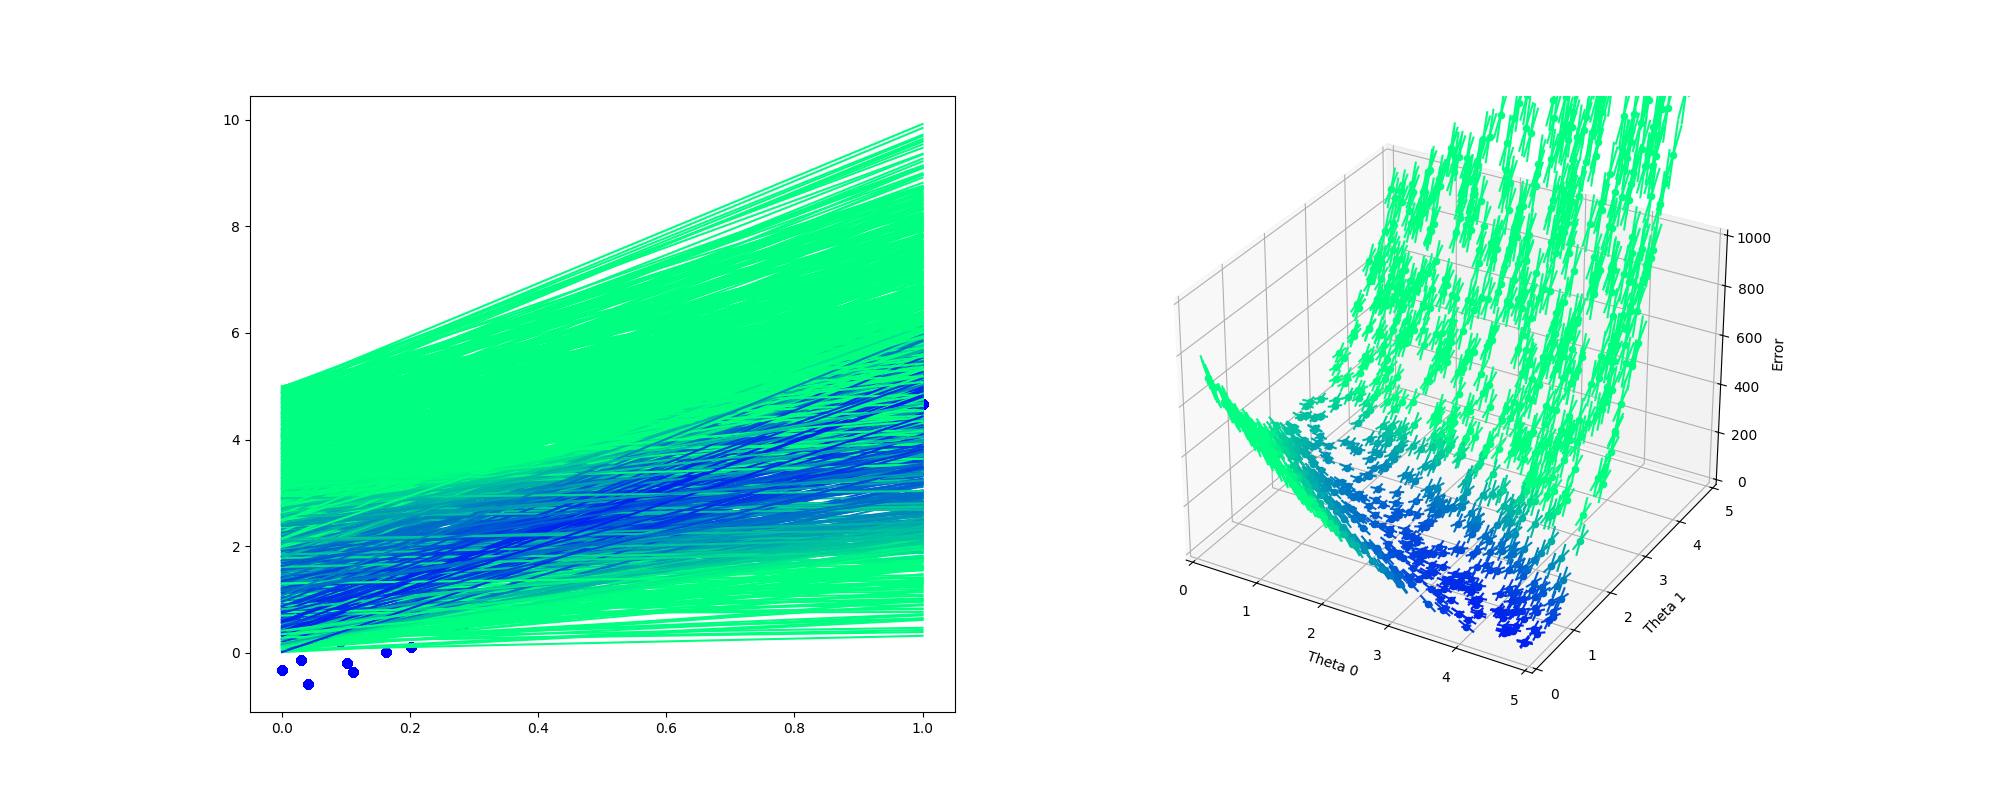

In [5]:
fig = plt.figure(figsize=(20, 8))
# fig.suptitle("A tale of 2 subplots")
ax_2d = fig.add_subplot(1, 2, 1)
ax_3d = fig.add_subplot(1, 2, 2, projection="3d")
cmap = plt.get_cmap("winter")
MAX_ERROR = 300


def predict(x, thetas):
    a, b = thetas
    y_hat = a * x + b
    return y_hat


def get_cost(y, y_hat):
    return ((y - y_hat) ** 2).sum()


def plot_linear_regression(x, y, thetas, show_errors=False):
    ax_2d.scatter(x, y, c="b")
    y_hat = predict(x, thetas)
    cost = get_cost(y, y_hat)
    ax_2d.plot(x, y_hat, c=cmap(cost / 300))
    if show_errors:
        for x_element, y_element, y_hat_element in zip(x, y, y_hat):
            plt.plot(
                (x_element, x_element), 
                (y_element, y_hat_element), 
                ":y"
            )
    # ax_2d.title(f"Error = {error}")
    return cost

def plot_cost(cost, thetas, x, y):
    ax_3d.scatter(
        thetas[0],
        thetas[1],
        zs=cost,
        c=cmap(cost / 300),
        # zdir="z",
        # c=c_list,
        label=f"θ({thetas[0]:.2f}, {thetas[1]:.2f}) cost={int(cost)}",
    )
    epsilon = 1e-1
    thetas_a = thetas.copy() - epsilon
    thetas_b = thetas.copy() + epsilon
    y_hat_a = predict(x, thetas_a)
    cost_a = get_cost(y, y_hat_a)
    y_hat_b = predict(x, thetas_b)
    cost_b = get_cost(y, y_hat_b)
    ax_3d.plot(
        (thetas_a[0], thetas_b[0]),
        (thetas[1], thetas[1]),
        (cost_a, cost_b),
        c=cmap(cost / 300),
	)
    ax_3d.plot(
        (thetas[0], thetas[0]),
        (thetas_a[1], thetas_b[1]),
        (cost_a, cost_b),
        c=cmap(cost / 300),
	)
    # ax_3d.legend()
    ax_3d.set_xlim(COEF_A_MIN, COEF_A_MAX)
    ax_3d.set_ylim(COEF_B_MIN, COEF_B_MAX)
    ax_3d.set_zlim(0, 1000)
    ax_3d.set_xlabel("Theta 0")
    ax_3d.set_ylabel("Theta 1")
    ax_3d.set_zlabel("Error")


for _ in range(10):
    a = (random.random() - COEF_A_MIN) * COEF_A_MAX
    b = (random.random() - COEF_B_MIN) * COEF_B_MAX
    thetas = np.array((a, b))
    cost = plot_linear_regression(x, y, thetas)
    plot_cost(cost, thetas, x, y)

In [7]:
a = (random.random() - COEF_A_MIN) * COEF_A_MAX
b = (random.random() - COEF_B_MIN) * COEF_B_MAX
thetas = np.array([a, b])

print(f"{thetas = }")
print(f"{COEF_A, COEF_B = }")

thetas = array([2.40003851, 0.49407398])
COEF_A, COEF_B = (2.9388335188256236, 4.834718602299604)


In [8]:
def add_intercept(x):
    vec_one = np.ones(x.shape[0])
    result = np.column_stack((x, vec_one))
    return result


def gradient(x, y, thetas):
    X = add_intercept(x)
    m = X.shape[0]
    gradient = 2 * (X.T @ ((X @ thetas) - y)) / m
    return gradient

gradient(x, y, thetas)

array([-4.67903215, -9.22008426])

In [9]:
def derivate(x, y, a, b):
	n = y.shape[0]
	da = 2*x*(a*x+b-y)/n
	db = 2*(a*x+b-y)/n
	return da.sum(), db.sum()

derivate(x, y, thetas[0], thetas[1])

(-4.679032153459427, -9.220084260731237)

In [10]:
print(f"{COEF_A = :.3f}")
print(f"{COEF_B = :.3f}")

alpha = 1e-1

for i in range(int(1e3)):
    a, b  = thetas
    if i % 10 == 0:
        print(f"{a = :.3f} {b = :.3f}")
    d_thetas = gradient(x, y, thetas)
    thetas = thetas - (alpha * d_thetas)


COEF_A = 2.939
COEF_B = 4.835
a = 2.400 b = 0.494
a = 4.030 b = 3.997
a = 3.960 b = 4.269
a = 3.819 b = 4.357
a = 3.691 b = 4.427
a = 3.580 b = 4.487
a = 3.482 b = 4.539
a = 3.396 b = 4.585
a = 3.322 b = 4.625
a = 3.257 b = 4.660
a = 3.200 b = 4.690
a = 3.150 b = 4.717
a = 3.107 b = 4.740
a = 3.069 b = 4.760
a = 3.035 b = 4.778
a = 3.006 b = 4.794
a = 2.981 b = 4.807
a = 2.959 b = 4.819
a = 2.940 b = 4.830
a = 2.923 b = 4.839
a = 2.908 b = 4.847
a = 2.895 b = 4.853
a = 2.884 b = 4.859
a = 2.874 b = 4.865
a = 2.865 b = 4.869
a = 2.858 b = 4.873
a = 2.851 b = 4.877
a = 2.845 b = 4.880
a = 2.840 b = 4.883
a = 2.836 b = 4.885
a = 2.832 b = 4.887
a = 2.829 b = 4.889
a = 2.826 b = 4.890
a = 2.823 b = 4.892
a = 2.821 b = 4.893
a = 2.819 b = 4.894
a = 2.818 b = 4.895
a = 2.816 b = 4.896
a = 2.815 b = 4.896
a = 2.814 b = 4.897
a = 2.813 b = 4.898
a = 2.812 b = 4.898
a = 2.811 b = 4.898
a = 2.810 b = 4.899
a = 2.810 b = 4.899
a = 2.809 b = 4.899
a = 2.809 b = 4.900
a = 2.808 b = 4.900
a = 2.808 

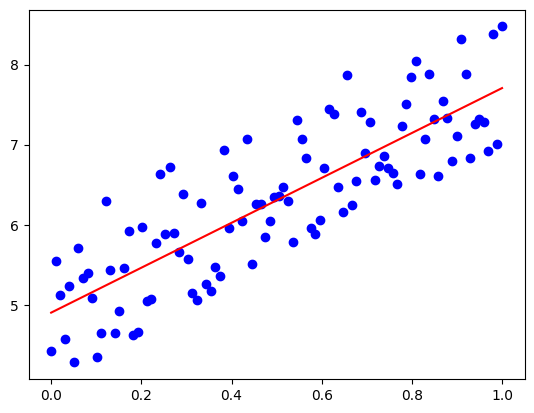

In [11]:
def plot_linear_regression(x, y, thetas, show_errors=False):
    plt.scatter(x, y, c="b")
    y_hat = predict(x, thetas)
    error = get_cost(y, y_hat)
    plt.plot(x, y_hat, c="r")
    if show_errors:
        for x_element, y_element, y_hat_element in zip(x, y, y_hat):
            plt.plot((x_element, x_element), (y_element, y_hat_element), ":y")
    # ax_2d.title(f"Error = {error}")
    return error

cost = plot_linear_regression(x, y, thetas, show_errors=False)

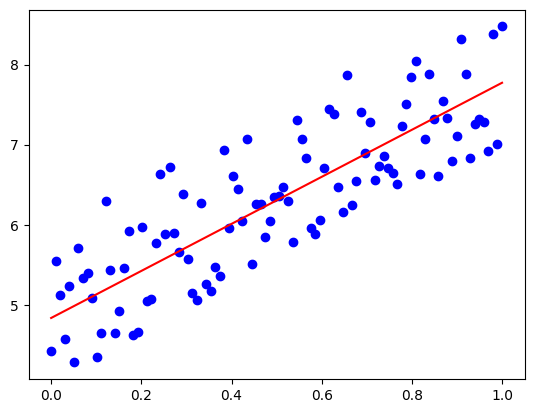

In [12]:
cost = plot_linear_regression(x, y, np.array([COEF_A, COEF_B]), show_errors=False)